## Twitter Sentiment Analysis using CNN

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import datasets,models,layers
import tensorflow as tf

In [31]:
Train_data = pd.read_csv('Training.csv',header=None, encoding='latin-1')
Test_data = pd.read_csv('Test.csv',header=None, encoding='latin-1')

In [32]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [33]:
Train_data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Data Preprocessing 

In [34]:
#Take the necessary the columns only
Train_data=Train_data[[5,0]]
Test_data=Test_data[[5,0]]

In [35]:
Train_data

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [36]:
Test_data

,5,0
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,4
1,Reading my kindle2... Love it... Lee childs i...,4
2,"Ok, first assesment of the #kindle2 ...it fuck...",4
3,@kenburbary You'll love your Kindle2. I've had...,4
4,@mikefish Fair enough. But i have the Kindle2...,4
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,2
494,"On that note, I hate Word. I hate Pages. I hat...",0
495,Ahhh... back in a *real* text editing environm...,4
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [37]:
Train_data[0].unique()


array([0, 4], dtype=int64)

#### 0 -> indicates negative
#### 2 -> indicates neutral
#### 4 -> indicates positive

In [38]:
Train_data.columns=['Text','Sentiment']
Test_data.columns=['Text','Sentiment']

In [39]:
Train_data

,Text,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [40]:
Test_data

,Text,Sentiment
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,4
1,Reading my kindle2... Love it... Lee childs i...,4
2,"Ok, first assesment of the #kindle2 ...it fuck...",4
3,@kenburbary You'll love your Kindle2. I've had...,4
4,@mikefish Fair enough. But i have the Kindle2...,4
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,2
494,"On that note, I hate Word. I hate Pages. I hat...",0
495,Ahhh... back in a *real* text editing environm...,4
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [15]:
# Mapping the 4 by 1 as 0 is far from the 4
#Train_data.Sentiment=Train_data.Sentiment.replace(4,1)
#Test_data.Sentiment=Test_data.Sentiment.replace(4,1)
#This way is operatable but give "SettingWithCopyWarning"

In [41]:
# Mapping the 4 by 1 as 0 is far from the 4
Train_data.loc[Train_data.Sentiment == 4, "Sentiment"] = 1
Test_data.loc[Test_data.Sentiment == 4, "Sentiment"] = 1

In [14]:
Train_data

,Text,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,1
1599996,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,Happy 38th Birthday to my boo of alll time!!! ...,1


In [16]:
Test_data

,Text,Sentiment
0,@stellargirl I loooooooovvvvvveee my Kindle2. ...,1
1,Reading my kindle2... Love it... Lee childs i...,1
2,"Ok, first assesment of the #kindle2 ...it fuck...",1
3,@kenburbary You'll love your Kindle2. I've had...,1
4,@mikefish Fair enough. But i have the Kindle2...,1
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,2
494,"On that note, I hate Word. I hate Pages. I hat...",0
495,Ahhh... back in a *real* text editing environm...,1
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [42]:
Test_data['Sentiment'].unique()

array([1, 0, 2], dtype=int64)

In [43]:
#Concatenate the data
df=pd.concat([Train_data, Test_data], axis=0)

In [20]:
df

,Text,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
493,Ask Programming: LaTeX or InDesign?: submitted...,2
494,"On that note, I hate Word. I hate Pages. I hat...",0
495,Ahhh... back in a *real* text editing environm...,1
496,"Trouble in Iran, I see. Hmm. Iran. Iran so far...",0


In [22]:
# Save the concatenated data to a new file
#df.to_csv('concatenated_data.csv', index=False)

In [44]:
#Shuffle the data
df=df.sample(frac=1).reset_index(drop=1)

### NLP Processing

In [45]:
#Remove the special characters 
#regex=True:This parameter is set to True to enable regular expression matching.
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)

In [46]:
df

,Text,Sentiment
0,austin makes me reallll happy,1
1,Oh joy fire alarm at school in the rain S Now ...,0
2,i couldnt get through to gabrielsaporta last n...,0
3,watching leah and the boys play with the train...,1
4,MontyMacalino A Cinderella Story ya know its ...,1
...,...,...
1600493,ispyvictoria i love your hooters hahaha,1
1600494,itsashlz mmmmmwwwwaaaaaarrrrr i MISS YOU,0
1600495,FizzyDuck Is that the Linda Evans of container...,1
1600496,very sad episode of dr house today soice crea...,0


In [47]:
X=df['Text']
y=df['Sentiment']

In [26]:
X

0          Aaaaannnnd my iPod Touch just told me I have 1...
1                           evaangelinaxxx Sound good to me 
2          BabaMzungu pole my friendmust be the H1N1 flu ...
3                            AmandaRoseCreep i love you too 
4          jasonaw ignore me looks like 103 final is out ...
                                 ...                        
1600493    I feel so bad for Danielle she has an itchy rash 
1600494    New plan stan  S H O P P I N G English Country...
1600495    kateszandc still trying to get around it came ...
1600496        4TheMorningShow THANK goodness for le coffee 
1600497              Xenooo Such is life in the Philippines 
Name: Text, Length: 1600498, dtype: object

In [27]:
y

0          0
1          1
2          1
3          1
4          1
          ..
1600493    0
1600494    1
1600495    0
1600496    1
1600497    0
Name: Sentiment, Length: 1600498, dtype: int64

In [48]:
X_train,X_test,y_train,y_test=X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(1280398,)

In [16]:
X_test.shape

(320100,)

In [17]:
y_train.shape

(1280398,)

### Sentence segmentation

In [50]:
#Many algorithms and tools operate on the sentence level rather than the entire text.
max_features = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

In [51]:
# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [52]:
X_train

[[297, 13, 44, 2, 257],
 [44, 34, 2, 362, 355, 21, 3, 465],
 [4962, 3, 3331, 8, 5558, 91, 3, 3331, 56, 22, 102, 111, 1, 188, 308],
 [1530, 8, 350, 77, 4, 1530],
 [222, 58, 36, 43, 1132, 11, 27, 1079, 89, 71, 26, 108, 354, 1, 1379, 7, 192],
 [395,
  141,
  37,
  1,
  60,
  26,
  78,
  1,
  62,
  2,
  123,
  2,
  4437,
  21,
  3,
  945,
  1,
  62,
  2,
  32,
  132,
  101,
  2,
  22,
  455,
  2,
  17,
  4,
  4588],
 [2212, 3, 3, 1499, 95, 92, 6, 28, 1, 87, 2, 2621, 84, 1, 39, 69, 2, 2655, 9],
 [288,
  694,
  19,
  79,
  36,
  65,
  231,
  1,
  68,
  61,
  59,
  103,
  323,
  32,
  2,
  57,
  147,
  134,
  2934],
 [2182,
  577,
  31,
  6,
  1,
  68,
  17,
  37,
  2349,
  1183,
  2,
  32,
  5,
  1122,
  138,
  3975,
  129,
  104,
  755],
 [98, 225, 7, 64, 5, 366, 3398, 67, 7, 35, 9, 91, 98, 124, 7, 55],
 [551, 1, 45, 3, 295, 115, 1005, 607, 14],
 [81, 626, 54, 17, 7, 186],
 [81,
  179,
  1,
  48,
  9,
  28,
  250,
  284,
  849,
  31,
  68,
  734,
  400,
  8650,
  6,
  3060,
  236,
  6,
  11

In [53]:
#The pad_sequences function used to ensure that all input sequences have the same length.
max_len = 100  # Maximum length of a sequence
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [54]:
# The Conv1D layer expects input shape of (sequence_length, input_dimension).
input_dim=1
input_shape = (max_len, input_dim)
embedding_dim = 100

### Embedding Layer


In [ ]:
"""
The embedding layer in a CNN-based text classification model is responsible for learning dense vector representations of words or tokens. 
These embeddings capture semantic relationships between words, 
allowing the subsequent convolutional layers to extract relevant features for the classification task.
"""
#It's Parameters:
#1-max_features: the size of the vocabulary or the total number of unique words
#2-embedding_dim: length of the vector representation of a word in an embedding space
#3-input_length: the length of the input 

In [56]:
CNN=models.Sequential([
    layers.Embedding(max_features, embedding_dim, input_length=max_len),
    layers.Conv1D(filters=32,kernel_size=5,activation='relu'),
    layers.MaxPooling1D(4),
    
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN.fit(X_train, y_train, epochs=5)

Epoch 1/5
40013/40013 [==============================] - 480s 12ms/step - loss: 0.4294 - accuracy: 0.8034
Epoch 2/5
40013/40013 [==============================] - 509s 13ms/step - loss: 0.3932 - accuracy: 0.8241
Epoch 3/5
40013/40013 [==============================] - 507s 13ms/step - loss: 0.3699 - accuracy: 0.8371
Epoch 4/5
40013/40013 [==============================] - 492s 12ms/step - loss: 0.3473 - accuracy: 0.8491
Epoch 5/5
40013/40013 [==============================] - 503s 13ms/step - loss: 0.3255 - accuracy: 0.8606


In [57]:
CNN.evaluate(X_test,y_test)

10004/10004 [==============================] - 20s 2ms/step - loss: 0.4348 - accuracy: 0.8108


[0.43483617901802063, 0.8107684850692749]

In [58]:
y_pred = CNN.predict(X_test)

10004/10004 [==============================] - 18s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

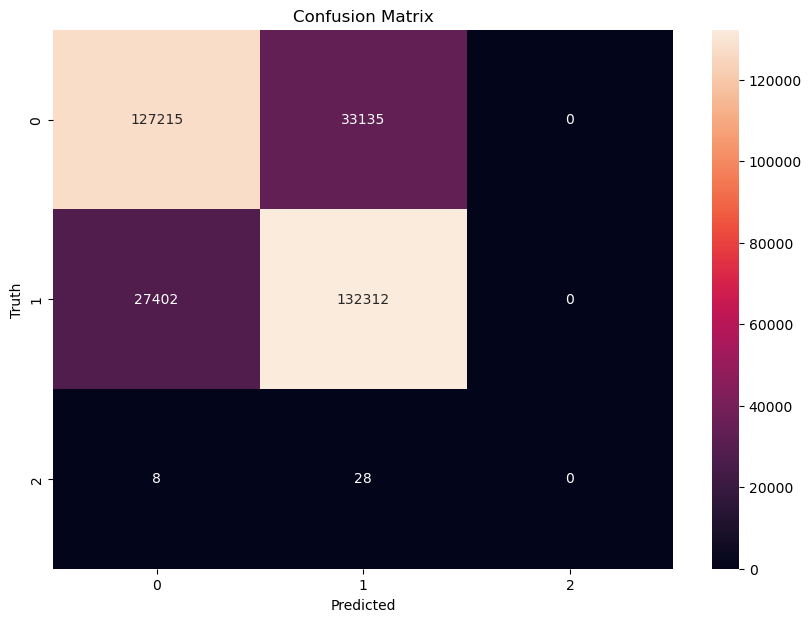

In [59]:
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')